In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [33]:
dataset = pd.read_csv("possum.csv")
df = dataset.copy()
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [56]:
df.isnull().sum()

case        0
site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [59]:
df.dropna(inplace = True)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      101 non-null    int64  
 1   site      101 non-null    int64  
 2   Pop       101 non-null    object 
 3   sex       101 non-null    object 
 4   age       101 non-null    float64
 5   hdlngth   101 non-null    float64
 6   skullw    101 non-null    float64
 7   totlngth  101 non-null    float64
 8   taill     101 non-null    float64
 9   footlgth  101 non-null    float64
 10  earconch  101 non-null    float64
 11  eye       101 non-null    float64
 12  chest     101 non-null    float64
 13  belly     101 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.8+ KB


In [61]:
num_df = df.select_dtypes(["int64", "float64"])
num_df.head()

,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


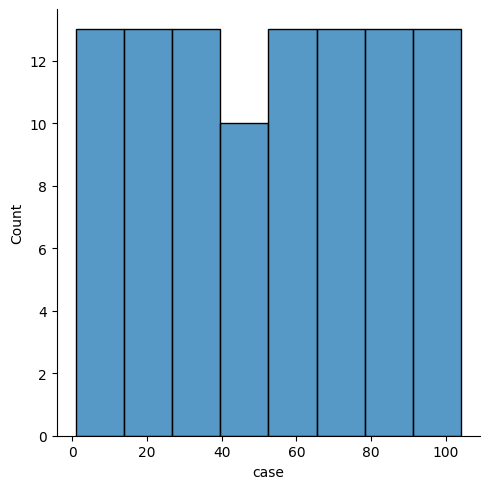

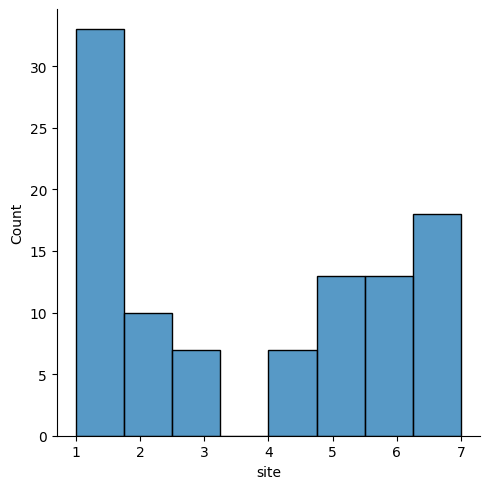

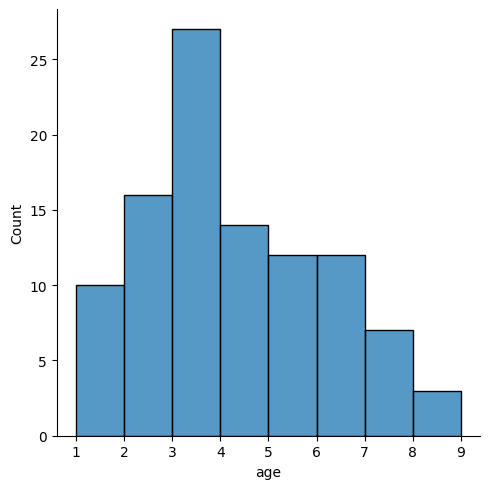

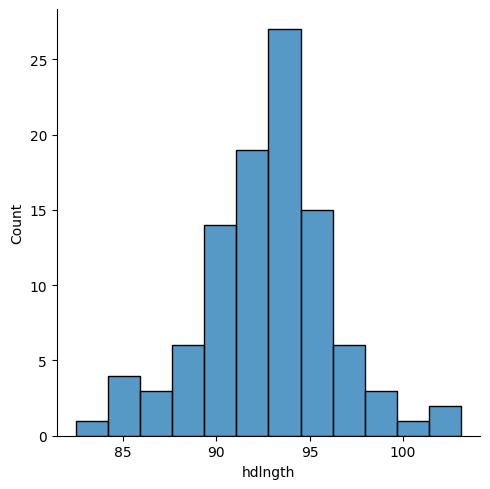

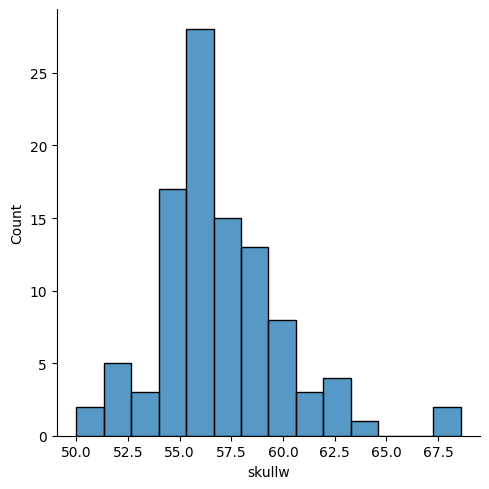

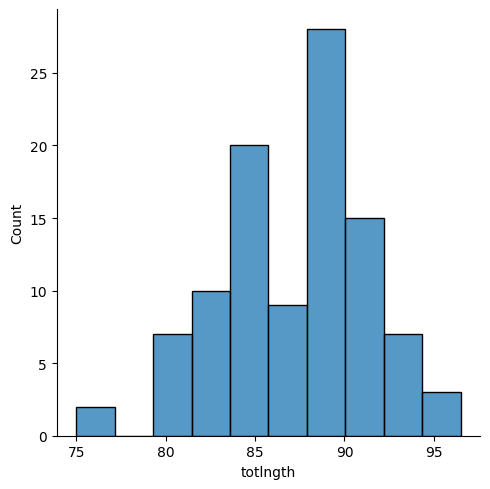

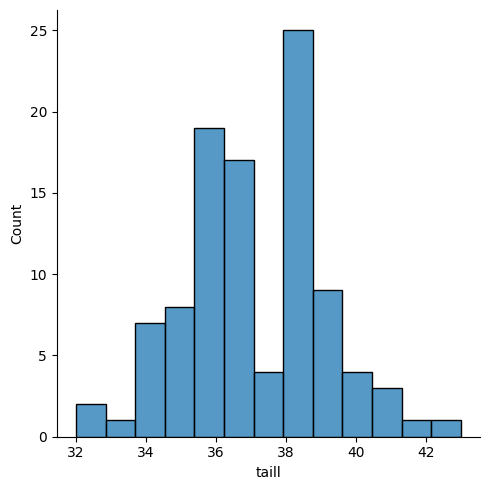

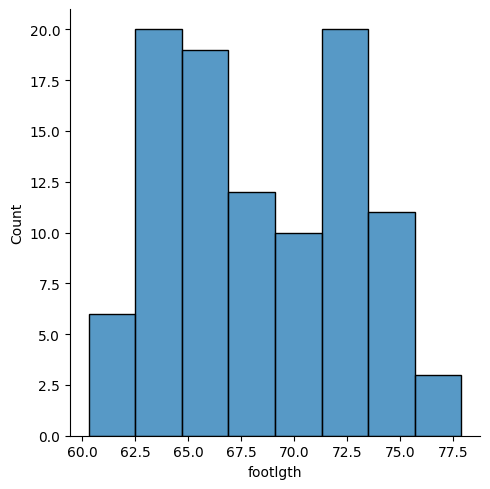

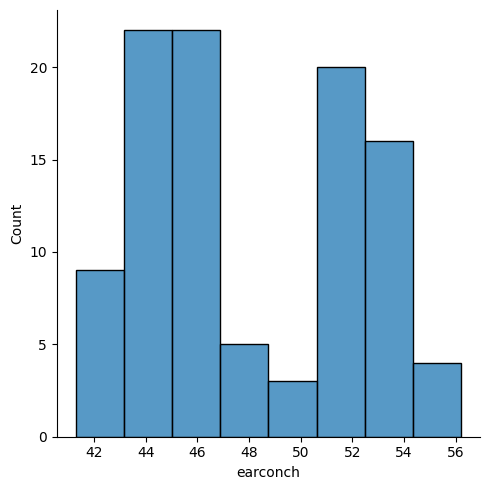

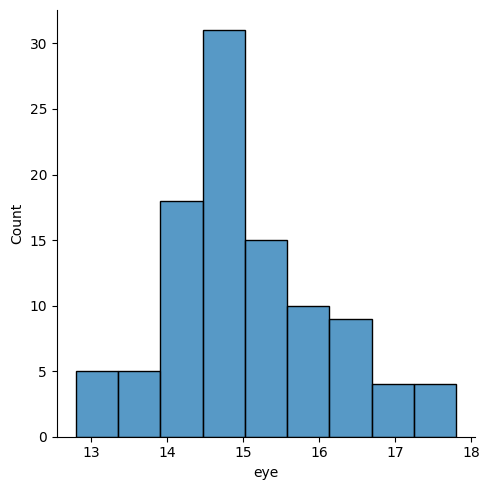

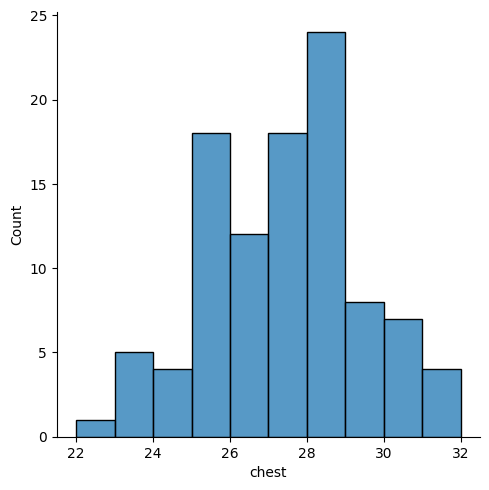

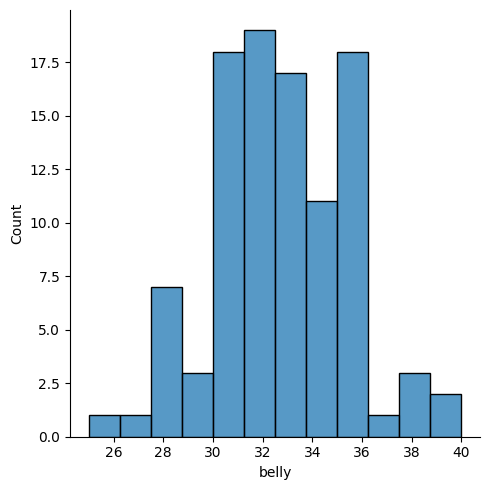

In [62]:
for col in num_df.columns:
    sns.displot(df[col])
plt.show()

# Shapiro-Wilk Testi

In [63]:
from scipy.stats import shapiro, normaltest, anderson

In [64]:
for col in num_df.columns:
    data = df[col]

    stats, p_value = shapiro(data)

    alpha = 0.05
    if p_value > alpha:
        print(f"{col} için p_value: {round(p_value, 10)} \nverilerin NORMAL DAĞILDIĞI sonucuna varabiliriz.\n")
    else:
        print(f"{col} için p_value: {round(p_value, 10)} \nverilerin NORMAL DAĞILMADIĞI sonucuna varabiliriz.\n")

case için p_value: 0.0007921558 
verilerin NORMAL DAĞILMADIĞI sonucuna varabiliriz.

site için p_value: 4.1e-09 
verilerin NORMAL DAĞILMADIĞI sonucuna varabiliriz.

age için p_value: 0.0001246421 
verilerin NORMAL DAĞILMADIĞI sonucuna varabiliriz.

hdlngth için p_value: 0.1648768861 
verilerin NORMAL DAĞILDIĞI sonucuna varabiliriz.

skullw için p_value: 0.0001380455 
verilerin NORMAL DAĞILMADIĞI sonucuna varabiliriz.

totlngth için p_value: 0.3045354867 
verilerin NORMAL DAĞILDIĞI sonucuna varabiliriz.

taill için p_value: 0.2228095334 
verilerin NORMAL DAĞILDIĞI sonucuna varabiliriz.

footlgth için p_value: 0.0010233648 
verilerin NORMAL DAĞILMADIĞI sonucuna varabiliriz.

earconch için p_value: 9.0837e-06 
verilerin NORMAL DAĞILMADIĞI sonucuna varabiliriz.

eye için p_value: 0.0855444736 
verilerin NORMAL DAĞILDIĞI sonucuna varabiliriz.

chest için p_value: 0.3121142378 
verilerin NORMAL DAĞILDIĞI sonucuna varabiliriz.

belly için p_value: 0.5633678399 
verilerin NORMAL DAĞILDIĞI sonu

# D'Agostino's K^2 Normality Test

In [65]:
for col in num_df.columns:
    data = df[col]

    stats, p_value = normaltest(df[col])

    alpha = 0.05
    if p_value > alpha:
        print(f"{col} için normallik testi p_value: {round(p_value, 10)} değerine bakıldığında verilerin NORMAL DAĞILDIĞI sonucuna varabiliriz.\n")
    else:
        print(f"{col} için normallik testi p_value: {round(p_value, 10)} değerine bakıldığında verilerin NORMAL DAĞILMADIĞI sonucuna varabiliriz.\n")

case için normallik testi p_value: 9e-10 değerine bakıldığında verilerin NORMAL DAĞILMADIĞI sonucuna varabiliriz.

site için normallik testi p_value: 0.0 değerine bakıldığında verilerin NORMAL DAĞILMADIĞI sonucuna varabiliriz.

age için normallik testi p_value: 0.0682510583 değerine bakıldığında verilerin NORMAL DAĞILDIĞI sonucuna varabiliriz.

hdlngth için normallik testi p_value: 0.1841077301 değerine bakıldığında verilerin NORMAL DAĞILDIĞI sonucuna varabiliriz.

skullw için normallik testi p_value: 5.8089e-06 değerine bakıldığında verilerin NORMAL DAĞILMADIĞI sonucuna varabiliriz.

totlngth için normallik testi p_value: 0.5606596857 değerine bakıldığında verilerin NORMAL DAĞILDIĞI sonucuna varabiliriz.

taill için normallik testi p_value: 0.5626103238 değerine bakıldığında verilerin NORMAL DAĞILDIĞI sonucuna varabiliriz.

footlgth için normallik testi p_value: 4.85e-08 değerine bakıldığında verilerin NORMAL DAĞILMADIĞI sonucuna varabiliriz.

earconch için normallik testi p_value: 0.

# Anderson Darling Testi

In [98]:
for col in num_df.columns:
    data = df[col]
    result = anderson(data)

    print(f"\n{col} için test istatistiği değeri:       {result.statistic}")
    print(f"Kritik Değerler:                        {result.critical_values}")
    print(f"Anlamlılık Seviyeleri:                  {result.significance_level}\n")
    p = 0
    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]

        # Eğer test istatistiği belirli bir anlamlılık seviyesindeki kritik değerden küçükse;
        # verilerin o anlamlılık seviyesinde normal dağılıma uyduğu kabul edilir.

        if result.statistic < result.critical_values[i]:
            print(f"{sl} seviyesinde, K.D: {cv} ---> KD >= {result.statistic:.3f} olduğu için veriler normal dağılıma uygundur.")
        else:
            print(f"{sl} seviyesinde, K.D: {cv} ---> KD < {result.statistic:.3f} olduğu için veriler normal dağılıma uygun değildir.")
    print(70 * "*")


case için test istatistiği değeri:       1.2847224687307204
Kritik Değerler:                        [0.555 0.633 0.759 0.885 1.053]
Anlamlılık Seviyeleri:                  [15.  10.   5.   2.5  1. ]

15.0 seviyesinde, K.D: 0.555 ---> KD < 1.285 olduğu için veriler normal dağılıma uygun değildir.
10.0 seviyesinde, K.D: 0.633 ---> KD < 1.285 olduğu için veriler normal dağılıma uygun değildir.
5.0 seviyesinde, K.D: 0.759 ---> KD < 1.285 olduğu için veriler normal dağılıma uygun değildir.
2.5 seviyesinde, K.D: 0.885 ---> KD < 1.285 olduğu için veriler normal dağılıma uygun değildir.
1.0 seviyesinde, K.D: 1.053 ---> KD < 1.285 olduğu için veriler normal dağılıma uygun değildir.
**********************************************************************

site için test istatistiği değeri:       5.7333411585853895
Kritik Değerler:                        [0.555 0.633 0.759 0.885 1.053]
Anlamlılık Seviyeleri:                  [15.  10.   5.   2.5  1. ]

15.0 seviyesinde, K.D: 0.555 ---> KD < 5.733 